In [298]:
#%reset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = 0.5,random_state=10) #need for neural network and random forest


In [299]:
all_state_weekly_data = pd.read_csv("all_state_weekly_data_cases_deaths_admissions_hospital.csv")
all_state_weekly_data = all_state_weekly_data.loc[:, all_state_weekly_data.columns != 'Unnamed: 0']
all_state_weekly_data = all_state_weekly_data.fillna(0)

In [314]:
all_state_weekly_data

,date,AK_cases,AL_cases,AR_cases,AZ_cases,CA_cases,CO_cases,CT_cases,DC_cases,DE_cases,...,CA_admissions,CA_admissions_delta_100k,NC_admissions,NC_admissions_delta_100k,FL_admissions,FL_admissions_delta_100k,OR_admissions,OR_admissions_delta_100k,NY_admissions,NY_admissions_delta_100k
0,2020-07-05,8.36,6.02,6.40,10.77,5.15,4.45,31.98,21.80,6.17,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034651,0.014851
1,2020-07-12,25.36,1.98,7.83,7.47,17.20,14.74,9.75,1.32,39.63,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009900,-0.024751
2,2020-07-19,37.01,6.49,31.53,6.57,36.08,20.34,1.24,12.04,11.31,...,7.954328,7.954328,9.952691,9.952691,18.794525,18.794525,3.870429,3.870429,3.470082,3.460182
3,2020-07-26,13.05,15.64,1.35,48.77,13.25,4.36,6.89,46.40,12.54,...,17.345241,9.390913,17.251969,7.299278,42.570900,23.776374,12.012491,8.142062,9.910278,6.440196
4,2020-08-02,0.60,14.27,10.77,12.08,7.13,15.47,8.22,17.22,35.40,...,24.133609,6.788368,30.978827,13.726858,37.640123,-4.930777,16.661726,4.649235,16.177218,6.266939
5,2020-08-09,7.12,5.35,31.78,12.54,17.03,10.15,12.78,2.07,27.87,...,22.145659,-1.987950,29.369538,-1.609290,31.465044,-6.175079,18.455340,1.793614,10.291443,-5.885775
6,2020-08-16,6.94,13.28,11.46,20.68,12.69,20.14,23.60,2.31,5.93,...,20.876001,-1.269657,27.492033,-1.877505,29.213230,-2.251814,21.924566,3.469226,9.197451,-1.093992
7,2020-08-23,11.20,9.26,1.25,19.96,3.26,6.73,3.11,24.16,14.00,...,19.257315,-1.618687,27.099290,-0.392743,24.969604,-4.243626,16.378524,-5.546042,11.405235,2.207784
8,2020-08-30,13.25,20.27,3.91,5.14,8.64,7.47,13.98,17.54,20.65,...,17.089792,-2.167523,33.881296,6.782007,21.886708,-3.082896,13.782505,-2.596020,10.489450,-0.915785
9,2020-09-06,3.96,5.61,36.16,14.48,10.14,20.17,5.05,7.55,6.43,...,16.189397,-0.900395,30.902195,-2.979102,20.424189,-1.462519,12.744097,-1.038408,11.167626,0.678176


In [300]:
column_names = ['state']
categories_for_subsetting = ['deaths', 'cases', 'hospitalizations', 'hospitalizations_delta_100k', 'admissions','admissions_delta_100k', 'over_15_100k']

for week in range(1, len(all_state_weekly_data) + 1):
    for category in categories_for_subsetting:
        column_name = f'week_{week}_{category}'
        column_names.append(column_name)


state_abb = []
for column in all_state_weekly_data.columns:
    state_abb.append(column[:2])
state_abb = set(state_abb[1:])


In [301]:
all_state_weekly_data_by_state = pd.DataFrame(index=range(51), columns=column_names)

x = 0

categories_for_subsetting = ['deaths', 'cases', 'hospitalizations', 'hospitalizations_delta_100k', 'admissions','admissions_delta_100k', 'over_15_100k']
for abb in state_abb:
    matching_indices = [i for i, state in enumerate(all_state_weekly_data) if state == abb]
    all_state_weekly_data_by_state.loc[x, 'state'] = abb
    columns_to_subset =  [f'{abb}_{category}' for category in categories_for_subsetting]
    j = 1
    for row in range(len(all_state_weekly_data.loc[:, columns_to_subset])):
        all_state_weekly_data_by_state.iloc[x, j:j + len(categories_for_subsetting)] = all_state_weekly_data.loc[row,columns_to_subset]
        j += 7
    x += 1

#all_state_weekly_data_by_state.set_index('state', inplace = True)

In [311]:
target_months= [col for col in all_state_weekly_data_by_state.columns if 'week_4' in col]

X_train = all_state_weekly_data_by_state[target_months[0:len(target_months)-1]]
X_train.columns = range(1, len(X_train.columns) + 1)

y_train = all_state_weekly_data_by_state[target_months[-1]].astype(int)
X_train, y_train = oversample.fit_resample(X_train, y_train)


test_months= [col for col in all_state_weekly_data_by_state.columns if 'week_9' in col]

X_test = all_state_weekly_data_by_state[test_months[0:len(test_months)-1]]
X_test.columns = range(1, len(X_train.columns) + 1)

y_test = all_state_weekly_data_by_state[test_months[-1]].astype(int)

In [312]:

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the decision tree classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9803921568627451
[[40  0]
 [ 1 10]]


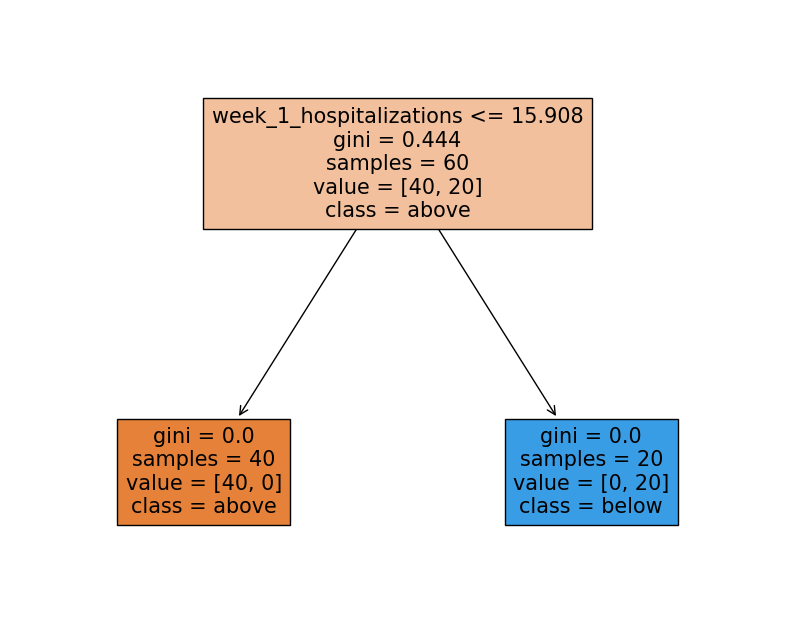

In [305]:
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=['week_1_deaths',	'week_1_cases',	'week_1_hospitalizations',	'week_1_hospitalizations_delta_100k	week_1_admissions',	'week_1_admissions_delta_100k'], class_names=['above', 'below'], filled=True)
plt.show()